In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv('08-Linear-Regression-Models/Advertising.csv')

In [31]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [41]:
X = df.drop('sales',axis=1)

In [43]:
y = df['sales']

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [46]:
poly_features = polynomial_converter.fit_transform(X)

In [47]:
poly_features.shape

(200, 9)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [50]:
model = LinearRegression(fit_intercept=True)

In [51]:
model.fit(X_train,y_train)

LinearRegression()

In [52]:
test_predictions = model.predict(X_test)

In [53]:
# model.coef_

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [55]:
MAE = mean_absolute_error(y_test,test_predictions)

In [56]:
MSE = mean_squared_error(y_test,test_predictions)

In [57]:
RMSE = np.sqrt(MSE)

In [58]:
MAE

0.4896798044803811

In [59]:
MSE

0.4417505510403745

In [60]:
RMSE

0.6646431757269268

In [61]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [62]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.3517083688399342,
 0.2509342947031756,
 0.19704459846550335,
 5.421420485986226,
 0.14180598547601236,
 0.16654227322955148]

In [63]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269268,
 0.5803286825165035,
 0.5077742649213955,
 2.575831166466207,
 4.492699702511413,
 1381.4044216899786,
 4449.599748615501,
 95891.24543526075]

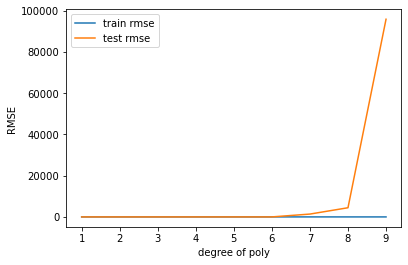

In [67]:
plt.plot(range(1,10),train_rmse_errors,label='train rmse')
plt.plot(range(1,10),test_rmse_errors,label='test rmse')
plt.xlabel('degree of poly')
plt.ylabel('RMSE')
plt.legend()

In [68]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [69]:
final_model = LinearRegression()

In [70]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [71]:
from joblib import dump,load

In [72]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [73]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [74]:
loaded_converter = load('final_converter.joblib')

In [75]:
loaded_model = load('final_poly_model.joblib')

In [76]:
campaign = [[149,22,12]]

In [78]:
transform_data = loaded_converter.fit_transform(campaign)

In [79]:
loaded_model.predict(transform_data)

array([14.64501014])